# Shopping Habit of Instacart Shoppers

GOALS:

- Clean the data:
    * Verify and fix data types (e.g. make sure ID columns are integers)
    * Identify and fill in missing values
    * Identify and remove duplicate values
- Report findings:
    * Create a plot that shows how many people place orders for each hour of the day.
    * Create a plot that shows what day of the week people shop for groceries.
    * Create a plot that shows how long people wait until placing their next order, and comment on the minimum and maximum values.
    * Plot the distribution for the number of orders that customers place 
    * List top 20 products that are ordered most frequently
    * List top 20 items that are reordered most frequently
    * List top 20 items that people put in their carts first 

In [42]:
import pandas as pd
from matplotlib import pyplot as plt

In [43]:
df_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';', decimal=',')
display(df_orders.sample(5))
df_orders.info() 

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
383726,2776184,10747,34,2,13,2.0
390362,3411255,40958,15,5,9,15.0
476969,1063975,155469,58,3,22,28.0
432695,735655,159541,51,2,11,2.0
412806,1775480,126712,3,0,12,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   order_id                478967 non-null  int64 
 1   user_id                 478967 non-null  int64 
 2   order_number            478967 non-null  int64 
 3   order_dow               478967 non-null  int64 
 4   order_hour_of_day       478967 non-null  int64 
 5   days_since_prior_order  450148 non-null  object
dtypes: int64(5), object(1)
memory usage: 21.9+ MB


- included sep=';' parameter to determine delimeter and decimal=',' parameter since values were separated by commas
- Dataframe consisting of 478967 rows and 6 columns, of which 'days_since_prior_order' appears to be the only column with non-null values and the only column not an 'int64' datatype 

In [44]:
df_products = pd.read_csv('/datasets/products.csv', sep=';')
display(df_products.sample(5))
df_products.info()

,product_id,product_name,aisle_id,department_id
38875,38876,Milk Chocolate Mini Eggs,45,19
11019,11020,Oatcakes,78,19
3242,3243,Red Onions,83,4
18271,18272,Slices Cheddar Cheese,21,16
26634,26635,Medium Tomatillo Salsa,67,20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


- included sep=';' parameter to determine delimeter
- Dataframe consisting of 49694 rows, 4 columns with the 'product_name' column being the only column with non-null values and also the only column with 'object' datatype

In [45]:
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
display(df_aisles.sample(10))
df_aisles.info()

,aisle_id,aisle
1,2,specialty cheeses
43,44,eye ear care
32,33,kosher foods
29,30,latino foods
73,74,dish detergents
14,15,packaged seafood
68,69,soup broth bouillon
20,21,packaged cheese
8,9,pasta sauce
108,109,skin care


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


- included sep=';' parameter to determine delimeter
- Dataframe with 134 rows, 2 columns with no apparent non-null values

In [46]:
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')
display(df_departments.sample(10))
df_departments.info()

,department_id,department
5,6,international
4,5,alcohol
10,11,personal care
18,19,snacks
7,8,pets
20,21,missing
8,9,dry goods pasta
2,3,bakery
15,16,dairy eggs
1,2,other


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


- included sep=';' parameter to determine delimeter
- Dataframe consisting of 21 entries, 2 column with no non-null values

In [47]:
df_ord_prod = pd.read_csv('/datasets/order_products.csv', sep=';')
display(df_ord_prod.sample(10))
df_ord_prod.info(show_counts=True)

,order_id,product_id,add_to_cart_order,reordered
498390,2829539,25232,10.0,0
281722,3018428,9826,15.0,0
3432798,159265,1158,2.0,0
1142941,809247,23492,7.0,0
3721540,1404434,1940,1.0,1
3506832,2453374,9387,6.0,0
3678715,2689631,8379,1.0,1
1351921,2685962,25552,9.0,1
2331722,345163,36011,10.0,1
3675775,3228206,4942,4.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


- included sep=';' parameter to determine delimeter
- Dataframe consisting of 4545007 rows, 4 total columns. 
- 'Add_to_cart_order' column only column with non-null values and 'float64' datatype

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [48]:
# Check for duplicated orders
df_orders.loc[df_orders.duplicated()]

# called .duplicated() method on df_orders to find duplicate values, and called .loc to identify the rows in which duplicated values were found

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [49]:
df_orders.duplicated().sum()

15

In [50]:
# Check for all orders placed Wednesday at 2:00 AM
df_orders.query('order_dow == 3 and order_hour_of_day == 2')

# used .query() method to find orders placed on Wednesday (3) at 2:00AM (2), Total of 106 orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [51]:
# Remove duplicate orders
df_orders.drop_duplicates(inplace=True)

In [52]:
# Double check for duplicate rows
df_orders.duplicated().sum()

0

In [53]:
# Double check for duplicate order IDs only
df_orders['order_id'].duplicated().sum()

0

- Duplicate values were found by calling .duplicated() method on df_orders to find duplicate values, and called .loc to identify the rows in which duplicated values were found
- Duplicate values were dropper using .dropna() method, with inplace=True parameter in order to drop values and make changes to df, as duplicate orders would not be necessary for further analysis
- Duplicate values were present in data as customers might order items more than one time

### `products` data frame

In [54]:
# Check for fully duplicate rows
df_products.duplicated().sum()

0

In [55]:
# Check for just duplicate product IDs
df_products['product_id'].duplicated().sum()

0

In [56]:
# Check for just duplicate product names (convert names to lowercase to compare better)
df_products['product_name'].str.lower().duplicated().sum()

1361

In [57]:
# Check for duplicate product names that aren't missing
df_products[~df_products['product_name'].duplicated()]

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [58]:
df_products[(df_products['product_name'].notna()) & (df_products['product_name'].str.lower().duplicated())]


,product_id,product_name,aisle_id,department_id
2058,2059,Biotin 1000 Mcg,47,11
5455,5456,Green Tea With Ginseng and Honey,96,20
5558,5559,Cream Of Mushroom Soup,69,15
7558,7559,Cinnamon Rolls with Icing,105,13
9037,9038,American Cheese slices,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


### `departments` data frame

In [59]:
# Check for duplicated orders
display(df_departments.duplicated().sum())
df_departments['department_id'].duplicated().sum()

0

0

In [60]:
df_departments['department'].duplicated().sum()

0

### `aisles` data frame

In [61]:
# Check for duplicated orders
display(df_aisles.duplicated().sum())

df_aisles['aisle_id'].duplicated().sum()

0

0

In [62]:
df_aisles['aisle'].duplicated().sum()

0

### `order_products` data frame

In [63]:
# Check for fullly duplicate rows
df_ord_prod.duplicated().sum()

0

In [64]:
# Double check for any other tricky duplicates
df_ord_prod.duplicated(subset=['order_id', 'product_id', 'add_to_cart_order']).sum()

0

## Find and remove missing values


In [65]:
display(df_ord_prod.isna().sum())
df_ord_prod.dropna()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


### `products` data frame

In [82]:
display(df_products.isna().sum())
df_products.duplicated().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

0

In [67]:
# Are all of the missing product names associated with aisle ID 100?
df_products.loc[df_products['product_name'].isna()]

# checking location for rows with 'NaN' value in the 'product_name' column, total of 1258 rows, most appear to be associated with Aisle ID 100

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [68]:
df_products[(df_products['aisle_id'] == 100) & df_products['product_name'].isna()]

# Checking for total results for Aisle ID 100, appears to be 1258 rows, which is the same as our previous cell which looks for 'NaN' values in the 'product_name' column
# We can draw the conclusion all of the missing product names are associated with aisle ID 100

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [69]:
# Are all of the missing product names associated with department ID 21?
prod_aisle = df_products.merge(df_aisles, on = 'aisle_id')

dep_aisle = prod_aisle.merge(df_departments, on = 'department_id')

dep_aisle.query('aisle_id == 100 & department_id == 21')


,product_id,product_name,aisle_id,department_id,aisle,department
42819,38,NaN,100,21,missing,missing
42820,72,NaN,100,21,missing,missing
42821,110,NaN,100,21,missing,missing
42822,297,NaN,100,21,missing,missing
42823,417,NaN,100,21,missing,missing
...,...,...,...,...,...,...
44072,49553,NaN,100,21,missing,missing
44073,49575,NaN,100,21,missing,missing
44074,49641,NaN,100,21,missing,missing
44075,49664,NaN,100,21,missing,missing


In [70]:
# What is this ailse and department?
prod_aisle = df_products.merge(df_aisles, on = 'aisle_id')

dep_aisle = prod_aisle.merge(df_departments, on = 'department_id')

dep_aisle.query('aisle_id == 100 & department_id == 21')

,product_id,product_name,aisle_id,department_id,aisle,department
42819,38,NaN,100,21,missing,missing
42820,72,NaN,100,21,missing,missing
42821,110,NaN,100,21,missing,missing
42822,297,NaN,100,21,missing,missing
42823,417,NaN,100,21,missing,missing
...,...,...,...,...,...,...
44072,49553,NaN,100,21,missing,missing
44073,49575,NaN,100,21,missing,missing
44074,49641,NaN,100,21,missing,missing
44075,49664,NaN,100,21,missing,missing


The aisle and department when 'aisle_id' == 100 and 'department_id' == 21 is missing. 

In [71]:
# Fill missing product names with 'Unknown'
df_products['product_name'].fillna('Unknown', inplace=True)
df_products.query('aisle_id == 100 and department_id == 21')

,product_id,product_name,aisle_id,department_id
37,38,Unknown,100,21
71,72,Unknown,100,21
109,110,Unknown,100,21
296,297,Unknown,100,21
416,417,Unknown,100,21
...,...,...,...,...
49552,49553,Unknown,100,21
49574,49575,Unknown,100,21
49640,49641,Unknown,100,21
49663,49664,Unknown,100,21


### `orders` data frame

In [72]:
df_orders.sample(15)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
94490,2720004,192967,8,5,18,6.0
112485,2814539,163338,27,4,9,30.0
233433,1564956,192752,25,2,12,5.0
399786,1442217,50421,7,4,11,11.0
277818,1047245,204093,14,5,18,7.0
141686,2036189,100441,1,5,22,NaN
123958,768481,94587,3,5,13,30.0
349106,245377,22428,32,4,15,4.0
276009,1391911,154349,29,4,7,7.0
13710,2151247,19982,6,6,10,3.0


In [73]:
# Are there any missing values where it's not a customer's first order?
df_orders.isna().sum()

# Results show 28817 missing values in 'days_since_prior_order' column.

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [74]:
df_orders[(df_orders['order_number'] == 1) & df_orders['days_since_prior_order'].isna()]

# Checking 'order_number' column, looking for customers' first order, which results in the 28817 missing values found in previous cell
# Can conclude that that the missing values are where it IS the customer's first order

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


### `order_products` data frame

In [75]:
df_ord_prod.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [76]:
# What are the min and max values in this column?
df_ord_prod['add_to_cart_order'].max()

64.0

In [77]:
df_ord_prod['add_to_cart_order'].min()

1.0

In [78]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
df_ord_prod_ids = df_ord_prod.loc[df_ord_prod['add_to_cart_order'].isna()]

df_ord_prod_ids.groupby('order_id').count()

# Checked for missing values in the dataframe for the 'add_to_cart_order' column, saved it as a new dataframe, and grouped new dataframe by 'order_id' column to count total number of orders with missing values in 'add_to_cart_order' column

,product_id,add_to_cart_order,reordered
order_id,,,
9310,1,0,1
61355,63,0,63
102236,31,0,31
129627,5,0,5
165801,6,0,6
...,...,...,...
2999801,6,0,6
3125735,22,0,22
3308010,51,0,51


In [79]:
df_ord_prod_ids = df_ord_prod[(df_ord_prod['order_id']) & df_ord_prod['add_to_cart_order'].isna()].values.tolist()

df_ord_prod_ids


[[1968313.0, 43867.0, nan, 0.0],
 [2926893.0, 11688.0, nan, 0.0],
 [1959075.0, 42828.0, nan, 1.0],
 [844733.0, 32717.0, nan, 0.0],
 [61355.0, 5322.0, nan, 0.0],
 [1564093.0, 6139.0, nan, 0.0],
 [129627.0, 31372.0, nan, 0.0],
 [293169.0, 44628.0, nan, 0.0],
 [1386261.0, 41007.0, nan, 0.0],
 [2136777.0, 46886.0, nan, 1.0],
 [3347453.0, 47175.0, nan, 0.0],
 [165801.0, 4137.0, nan, 0.0],
 [2094761.0, 5194.0, nan, 1.0],
 [3347453.0, 30727.0, nan, 0.0],
 [2136777.0, 45106.0, nan, 0.0],
 [2997021.0, 29418.0, nan, 0.0],
 [844733.0, 22151.0, nan, 0.0],
 [844733.0, 35221.0, nan, 0.0],
 [2136777.0, 2635.0, nan, 1.0],
 [165801.0, 6187.0, nan, 0.0],
 [2256933.0, 13457.0, nan, 1.0],
 [2409109.0, 26587.0, nan, 0.0],
 [3347453.0, 18782.0, nan, 0.0],
 [2926893.0, 4792.0, nan, 0.0],
 [1730767.0, 36316.0, nan, 1.0],
 [1169835.0, 16656.0, nan, 0.0],
 [844733.0, 4421.0, nan, 0.0],
 [293169.0, 18598.0, nan, 0.0],
 [61355.0, 8594.0, nan, 0.0],
 [1968313.0, 23995.0, nan, 1.0],
 [2136777.0, 6651.0, nan, 0.0],


In [80]:
#Saving the IDs of the order with missing values to a list

orders_list = df_ord_prod[df_ord_prod['add_to_cart_order'].isna()]['order_id'].to_list()

# Select all the entries attributed to those order IDs into a separate dataframe

orders_with_missing_values = df_ord_prod[df_ord_prod['order_id'].isin(orders_list)]

# Grouping by order ID and checking the size of each order - as we can see the minimum number of items is 65

orders_with_missing_values.groupby('order_id').size().sort_values()

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Length: 70, dtype: int64

- Can conclude that the majority of orders that have missing values have more than 65 items, with a max number of items at 127. 

 Do all orders with missing values have more than 64 products?

- Yes, all orders with missing values have more than 64 products. 



In [ ]:
# Replace missing values with 999 and convert column to integer type
df_ord_prod['add_to_cart_order'] = df_ord_prod['add_to_cart_order'].fillna(999)


In [ ]:
df_ord_prod['add_to_cart_order'] = df_ord_prod['add_to_cart_order'].astype('int')

- Replaced missing values with '999' in order to be able to convert that column into the 'int' type, as it is a 'str' 
- Converted 'add_to_cart_order' column to 'int' datatype using .astype() method 

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [86]:
df_orders['order_hour_of_day'].unique()

array([13, 12, 19, 20, 11,  8, 18, 15, 16,  9, 22, 10,  0, 14, 17,  1,  7,
        6,  2, 21,  3, 23,  5,  4])

In [87]:
df_orders['order_dow'].unique()

array([6, 5, 0, 4, 3, 1, 2])

### [A2] What time of day do people shop for groceries?

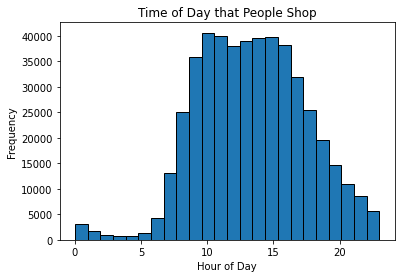

In [84]:
df_orders['order_hour_of_day'].plot(kind='hist', title='Time of Day that People Shop', bins=24, edgecolor="black")
plt.xlabel('Hour of Day')
plt.show()
 

- Histogram plot was chosen to show how frequently an hour appeared in the 'order_hour_of_day' column
- Can conclude that between 10:00AM and 16:00PM is when most people shop for groceries 

### [A3] What day of the week do people shop for groceries?

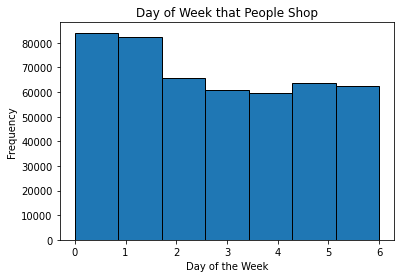

In [85]:
df_orders['order_dow'].plot(kind='hist', title= 'Day of Week that People Shop', bins=7, edgecolor="black")
plt.xlabel('Day of the Week')
plt.show()

-  Histogram plot was chosen to show how frequently a day appeared in the 'order_dow' column
-  Can conclude that most common days for grocery shopping are Sundays (0), Mondays (1), Tuesdays (2), Fridays (5) and Saturdays (6)

### [A4] How long do people wait until placing another order?

In [88]:
df_orders['days_since_prior_order'] = df_orders['days_since_prior_order'].astype('float')

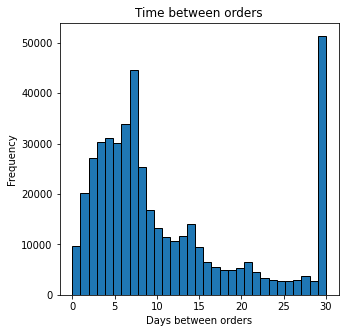

In [89]:
df_orders['days_since_prior_order'].plot(kind='hist', title= "Time between orders", bins=31, figsize=(5,5), edgecolor="black")
plt.xlabel('Days between orders')
plt.show()

- The most common amount of days that people wait in order to place another order is 29 days, with another common spike between 6 to 7 days. 

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

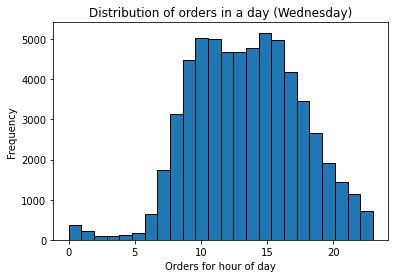

In [90]:
df_orders[df_orders['order_dow'] == 3]['order_hour_of_day'].plot(kind='hist', bins=24, title = 'Distribution of orders in a day (Wednesday)', edgecolor="black")
plt.xlabel('Orders for hour of day')
plt.show()

- Plotted histogram to determine the distribution of orders in the hour of day on a Wednesday. 
- Most common time for orders to occur on Wednesday are between 10:00AM and 16:00PM

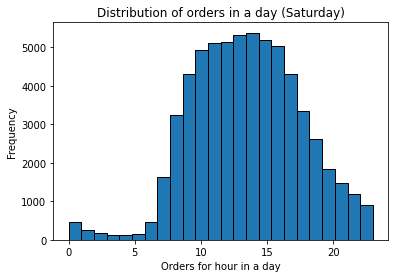

In [91]:
df_orders[df_orders['order_dow'] == 6]['order_hour_of_day'].plot(kind='hist', bins=24, title= 'Distribution of orders in a day (Saturday)', edgecolor="black")
plt.xlabel('Orders for hour in a day')
plt.show()

- Plotted histogram to determine the distribution of orders in the hour of day on a Saturday. 
- Most common time for orders to occur on Wednesday are between 10:00AM and 16:00PM

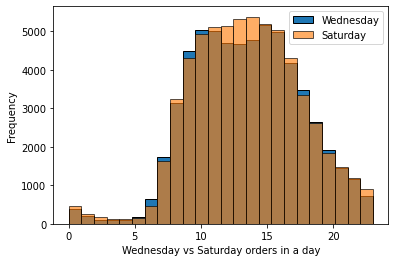

In [93]:
df_orders[df_orders['order_dow'] == 3]['order_hour_of_day'].plot(kind='hist', bins = 24, edgecolor="black")
df_orders[df_orders['order_dow'] == 6]['order_hour_of_day'].plot(kind='hist', bins = 24, alpha=0.64, edgecolor="black")
plt.xlabel('Wednesday vs Saturday orders in a day')
plt.legend(['Wednesday', 'Saturday'])
plt.show()

- The differences between the days of Wednesday and Saturday are very small, the graphs are almost identical. 
- Wednesday has higher values in 6 points, but very small difference
- Saturday has higher values in 10 ponts, but again, very small difference. 

### [B2] What's the distribution for the number of orders per customer?

In [94]:
display(df_orders['user_id'].value_counts())

149605    28
193164    26
78375     25
148162    24
66664     24
          ..
166116     1
63564      1
170214     1
51274      1
2047       1
Name: user_id, Length: 157437, dtype: int64

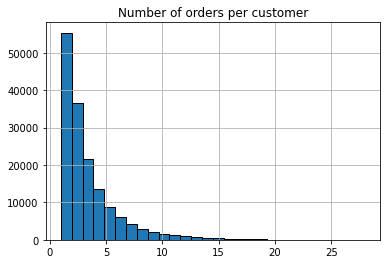

In [112]:
df_orders['user_id'].value_counts().hist(bins=28, edgecolor='black')
plt.title('Number of orders per customer')
plt.show()

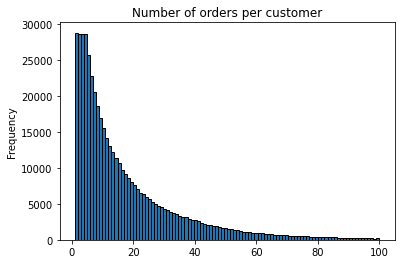

In [96]:
df_orders['order_number'].plot(kind='hist', title='Number of orders per customer', bins = 100, edgecolor='black')
plt.show()

- Plotted a histogram to show the distribution of the number of orders per customer, with most customers ordering between 1-4 times

### [B3] What are the top 20 popular products (display their id and name)?

In [103]:
top_prods = df_products.merge(df_ord_prod, on='product_id')

In [104]:
top_products = top_prods.merge(df_orders, on='order_id')

top_products.sample(15)

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
2599724,40334,Organic White Pita Bread,128,3,889428,22.0,1,192131,2,6,15,4.0
4384739,35921,Organic Large Grade A Brown Eggs,86,16,2254735,3.0,1,32336,29,0,15,5.0
3546007,6740,Organic Braeburn Apple,24,4,2189374,4.0,0,116532,20,1,9,12.0
3061967,13176,Bag of Organic Bananas,24,4,2525863,2.0,0,41572,12,6,11,11.0
4028579,13176,Bag of Organic Bananas,24,4,1058809,3.0,1,106845,12,5,16,11.0
3397463,15649,Baby Seedless Cucumbers,83,4,1756788,4.0,0,88954,8,2,8,2.0
4329869,41787,Bartlett Pears,24,4,2652736,14.0,1,163295,12,1,11,26.0
2623863,38579,Original Style Yoghurt Plain,120,16,1354766,5.0,0,192742,3,3,13,14.0
2289609,13176,Bag of Organic Bananas,24,4,2356225,3.0,1,198288,13,0,17,20.0
1893134,41950,Organic Tomato Cluster,83,4,2570650,17.0,1,72380,6,2,15,7.0


In [106]:
top_products_grouped = top_products.groupby(['product_name', 'product_id'])['order_number'].count().nlargest(20)
top_products_grouped

product_name              product_id
Banana                    24852         66050
Bag of Organic Bananas    13176         53297
Organic Strawberries      21137         37039
Organic Baby Spinach      21903         33971
Organic Hass Avocado      47209         29773
Organic Avocado           47766         24689
Large Lemon               47626         21495
Strawberries              16797         20018
Limes                     26209         19690
Organic Whole Milk        27845         19600
Organic Raspberries       27966         19197
Organic Yellow Onion      22935         15898
Organic Garlic            24964         15292
Organic Zucchini          45007         14584
Organic Blueberries       39275         13879
Cucumber Kirby            49683         13675
Organic Fuji Apple        28204         12544
Organic Lemon             5876          12232
Apple Honeycrisp Organic  8277          11993
Organic Grape Tomatoes    40706         11781
Name: order_number, dtype: int64

- Created new dataframe merging df_products dataframe with df_ord_prod dataframe on the product_id column 
- Created new data frame merging newly created top_prods dataframe with df_orders dataframe on 'order_id' column to be able to see 'product_name', 'product_id' and 'order_number' in same dataframe
- Using newly created dataframe, created new dataframe top_products_grouped, grouping by 'product_name' and 'product_id' columns and finding the total number of orders, sorting by the top 20 products. 
- List of to 20 most popular products, with the most popular item being Banana. 

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [107]:
top_products.sample(15)

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
204705,165,Wild Chanterelle Mushroom Ravioli,12,9,3153056,14.0,0,118178,3,0,12,8.0
2923517,18460,Brussel Sprouts,123,4,2243205,26.0,0,14277,4,2,14,5.0
131437,17461,Air Chilled Organic Boneless Skinless Chicken ...,35,12,1594699,3.0,1,40539,6,2,18,3.0
1339062,45877,Hershey's Chocolate Creme Pie Singles,119,1,671358,6.0,0,98457,2,0,12,7.0
1416894,14897,Sweet Potato Yam,83,4,1048867,8.0,1,16425,35,4,16,7.0
1374487,22935,Organic Yellow Onion,83,4,3064357,2.0,1,36826,14,0,8,10.0
676764,15613,Salted Tub of Butter,36,16,961945,15.0,1,124742,34,6,8,5.0
2055974,47766,Organic Avocado,24,4,1258320,9.0,1,181854,6,5,16,10.0
1033726,41198,Classic Peanut Butter,88,13,481433,13.0,0,46911,3,3,11,9.0
2134661,24179,Real Vegetable Chips- Sweets & Beets,107,19,1662461,3.0,1,195751,3,0,20,9.0


In [108]:
reord_products = top_products.groupby(['product_name', 'product_id'])['reordered'].sum().nlargest(20)

reord_products

product_name              product_id
Banana                    24852         55763
Bag of Organic Bananas    13176         44450
Organic Strawberries      21137         28639
Organic Baby Spinach      21903         26233
Organic Hass Avocado      47209         23629
Organic Avocado           47766         18743
Organic Whole Milk        27845         16251
Large Lemon               47626         15044
Organic Raspberries       27966         14748
Strawberries              16797         13945
Limes                     26209         13327
Organic Yellow Onion      22935         11145
Organic Garlic            24964         10411
Organic Zucchini          45007         10076
Cucumber Kirby            49683          9538
Organic Fuji Apple        28204          8989
Apple Honeycrisp Organic  8277           8836
Organic Blueberries       39275          8799
Organic Lemon             5876           8412
Organic Half & Half       49235          8389
Name: reordered, dtype: int64

- Created new dataframe, reord_products, in which we grouped top_products dataframe by 'product_name' and 'product_id' and found the number of times the product was reordered, ordered by top 20
- List of  top 20 items that are reordered most frequently, again Banana being the most popular item. 

### [C3] For each product, what proportion of its orders are reorders?

### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 

In [109]:
top_products.sample(15)

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
1554847,30661,Lower Sugar Maple & Brown Sugar Instant Oatmeal,130,14,1778392,15.0,0,94588,36,4,16,3.0
994171,19468,Classic Yellow Mustard,72,13,1856160,54.0,0,2335,29,6,9,7.0
3071025,13249,Skim Milk,84,16,1747353,12.0,1,25687,32,6,8,6.0
322330,27344,Uncured Genoa Salami,96,20,1300125,21.0,1,124942,12,3,22,5.0
3578626,7010,Organic White Basmati Rice,63,9,1800374,6.0,1,99607,13,2,20,30.0
582611,20842,Total 0% Greek Yogurt,120,16,1032167,6.0,0,88216,3,4,9,18.0
2869492,16423,Pasteurized Apple Juice,31,7,2515145,11.0,0,141108,10,6,19,13.0
1029043,18655,Mr Clean 40 Oz Dilute Lavender,114,17,2335505,14.0,0,144553,1,5,12,NaN
2010587,45007,Organic Zucchini,83,4,2955573,21.0,1,60001,43,0,11,6.0
2467753,25965,Santa Fe Fiesta Salad,1,20,1448626,5.0,1,27715,18,3,5,30.0


In [110]:
first_item = top_products.query('add_to_cart_order == 1')[['product_name', 'product_id']]

In [111]:
first_item.value_counts().nlargest(20)

product_name                 product_id
Banana                       24852         15562
Bag of Organic Bananas       13176         11026
Organic Whole Milk           27845          4363
Organic Strawberries         21137          3946
Organic Hass Avocado         47209          3390
Organic Baby Spinach         21903          3336
Organic Avocado              47766          3044
Spring Water                 19660          2336
Strawberries                 16797          2308
Organic Raspberries          27966          2024
Sparkling Water Grapefruit   44632          1914
Organic Half & Half          49235          1797
Large Lemon                  47626          1737
Soda                         196            1733
Organic Reduced Fat Milk     38689          1397
Limes                        26209          1370
Hass Avocados                12341          1340
Organic Reduced Fat 2% Milk  5785           1310
Half & Half                  27086          1309
Organic Yellow Onion         

- Created new variable to hold a query on top_products dataframe to filter by 'add_to_cart_order' column in which it equals 1 to represent item bieng placed in cart first, and grouped by 'product_name' and 'product_id' columns
- Used value_counts to determine number of times product was the first to be placed in cart, and sorted by top 20 items. 

# Conclusions

1. Between 10:00AM and 16:00PM is when most people shop for groceries
2. Most common days for grocery shopping: Sundays (0), Mondays (1), Fridays (5) and Saturdays (6)
3. Most common amount of days that people wait in order to place another order is 29 days, with another common spike between 6 to 7 days.
4. Most common time for orders to occur on Wednesday are between 10:00AM and 16:00PM
5. Most customers order between 1-4 times
6. Top 5 most common items are: Banana, Bag of organic Bananas, Organic Strawberries, Organic Baby Spinach and Organic Hass Avocado
7. Top 5 most frequent reordered items are: Banana, Bag of organic Bananas, Organic Strawberries, Organic Baby Spinach and Organic Hass Avocado
8. Top 5 most frequent item to be first to be placed in cart: Banana, Bag of organic Bananas, Organic Whole Milk, Organic Strawberries and Organic Hass Avocado. 